<a href="https://colab.research.google.com/github/gulabpatel/Causal_inference/blob/main/02_Causalnex_from_pandas_BayesianNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Docementation : https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html

* YouTube Video : https://www.youtube.com/watch?v=BdGFg1FnHhQ

#Structure Learning

##Structure from Domain Knowledge

In [ ]:
!pip install causalnex

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

In [ ]:
sm.add_edges_from([
    ('health', 'absences'),
    ('health', 'G1')
])

##Visualising the Structure

In [ ]:
sm.edges

OutEdgeView([('health', 'absences'), ('health', 'G1')])

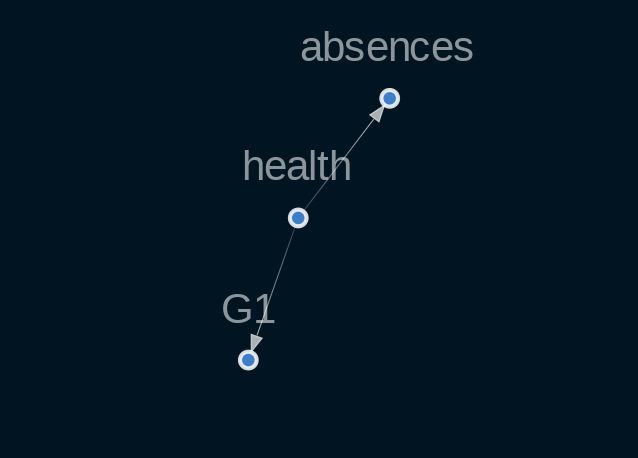

In [ ]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

#Learning the Structure

##Preparing the Data for Structure Learning

In [ ]:
!pip install download
import numpy as np
import pandas as pd
from download import download

path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip', '/content/data', kind="zip", replace=True)

In [ ]:
data = pd.read_csv('/content/data/student-por.csv', delimiter=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [ ]:
drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
data = data.drop(columns=drop_col)
data.head(25)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,U,LE3,T,1,1,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,U,GT3,T,4,2,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,U,GT3,T,3,3,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,U,LE3,T,4,3,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,U,LE3,T,2,2,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,U,GT3,A,4,4,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,U,LE3,A,3,2,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,U,GT3,T,3,4,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [ ]:
import numpy as np

struct_data = data.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])
struct_data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,1,1,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,1,0,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,1,0,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [ ]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(struct_data)

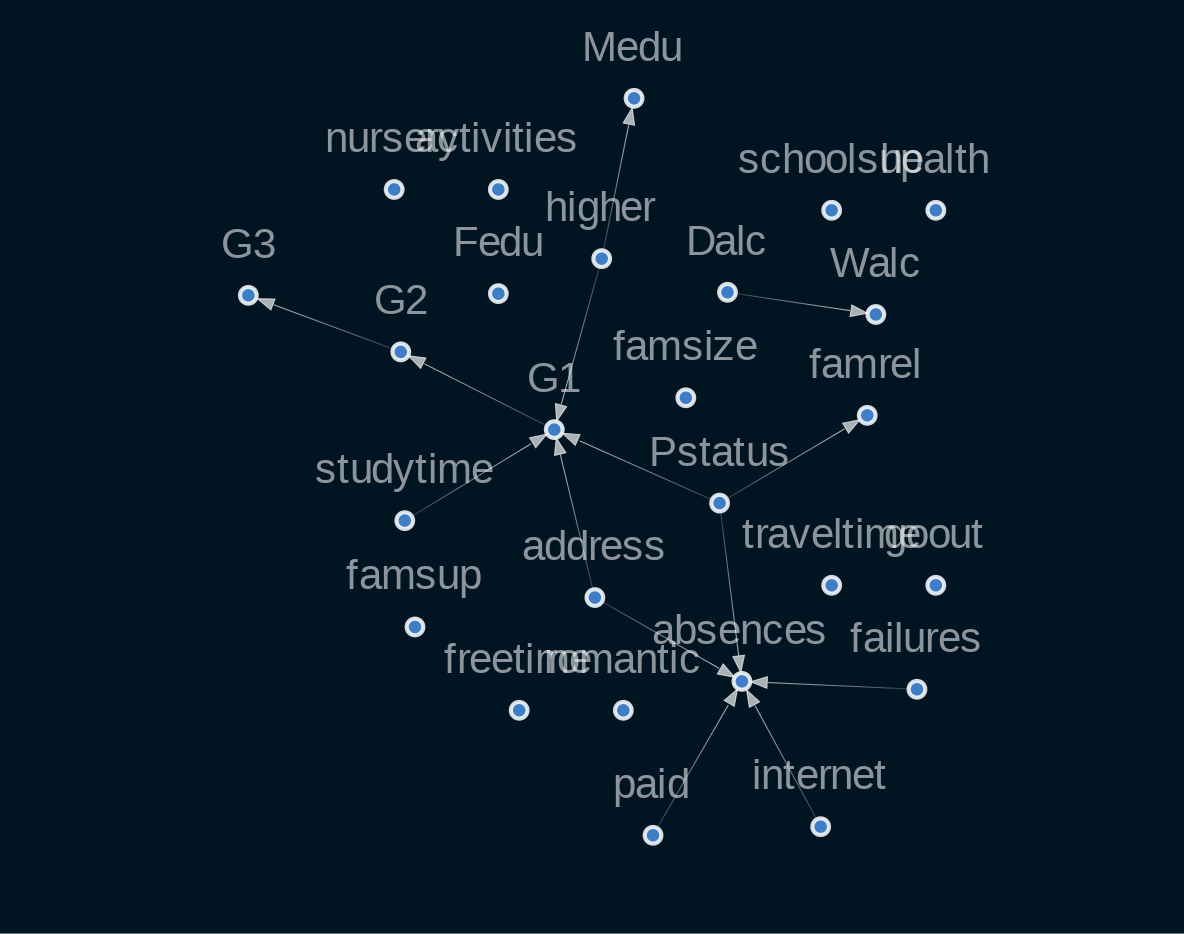

In [ ]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [ ]:
sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)

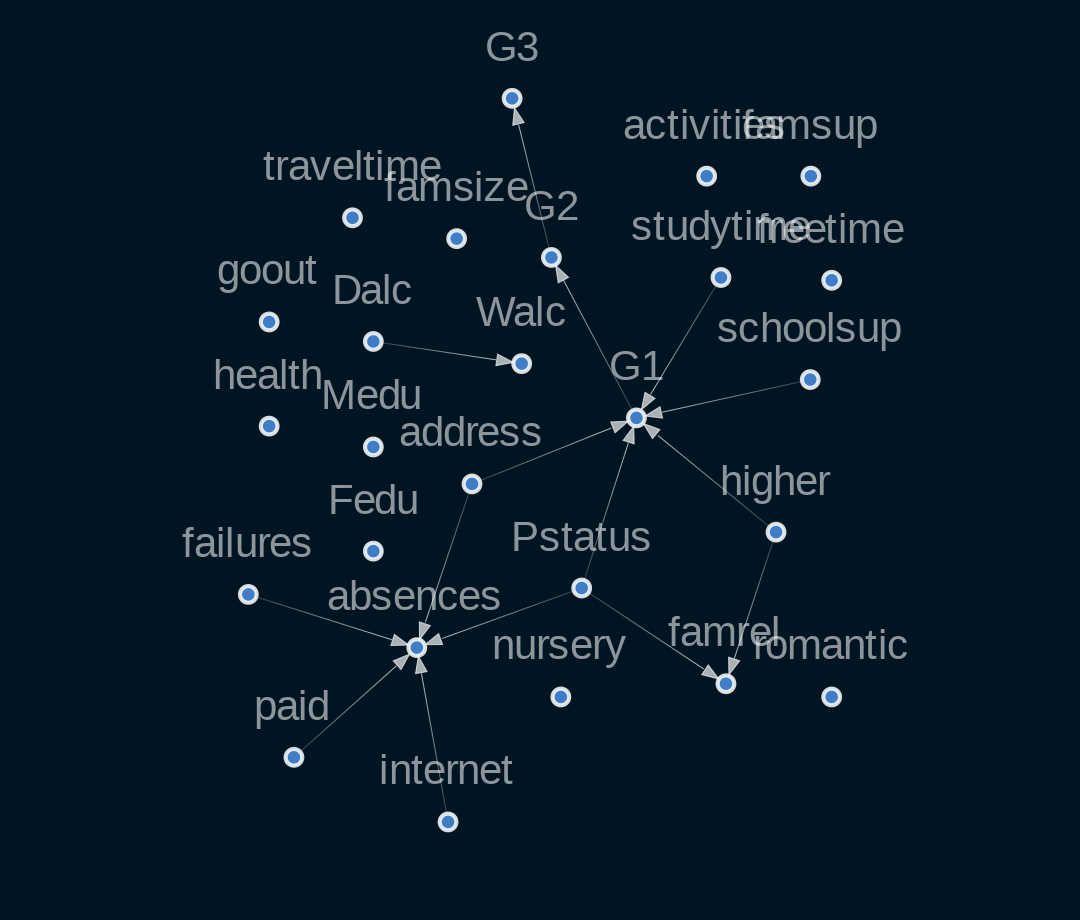

In [ ]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [ ]:
for u, v, w in sorted(sm.edges.data("weight")):
  print(f"{u}, {v}, {w}")

Dalc, Walc, 0.8738035475039484
G1, G2, 0.8895182947618904
G2, G3, 0.8849398565959541
Pstatus, G1, 1.2480053757249223
Pstatus, absences, -1.0538930003134765
Pstatus, famrel, 0.8434143131957207
address, G1, 1.0051485688531776
address, absences, 1.0400701009680509
failures, absences, 0.9395518798562345
higher, G1, 2.714465995408268
higher, famrel, 0.8766853798065847
internet, absences, 0.8369255227925567
paid, absences, -1.0534664984401485
schoolsup, G1, -0.8021956339446027
studytime, G1, 0.8596862599376622


#Modifying the Structure

In [ ]:
sm.add_edge("failures", "G1")
sm.remove_edge("Pstatus", "G1")
sm.remove_edge("address", "G1")

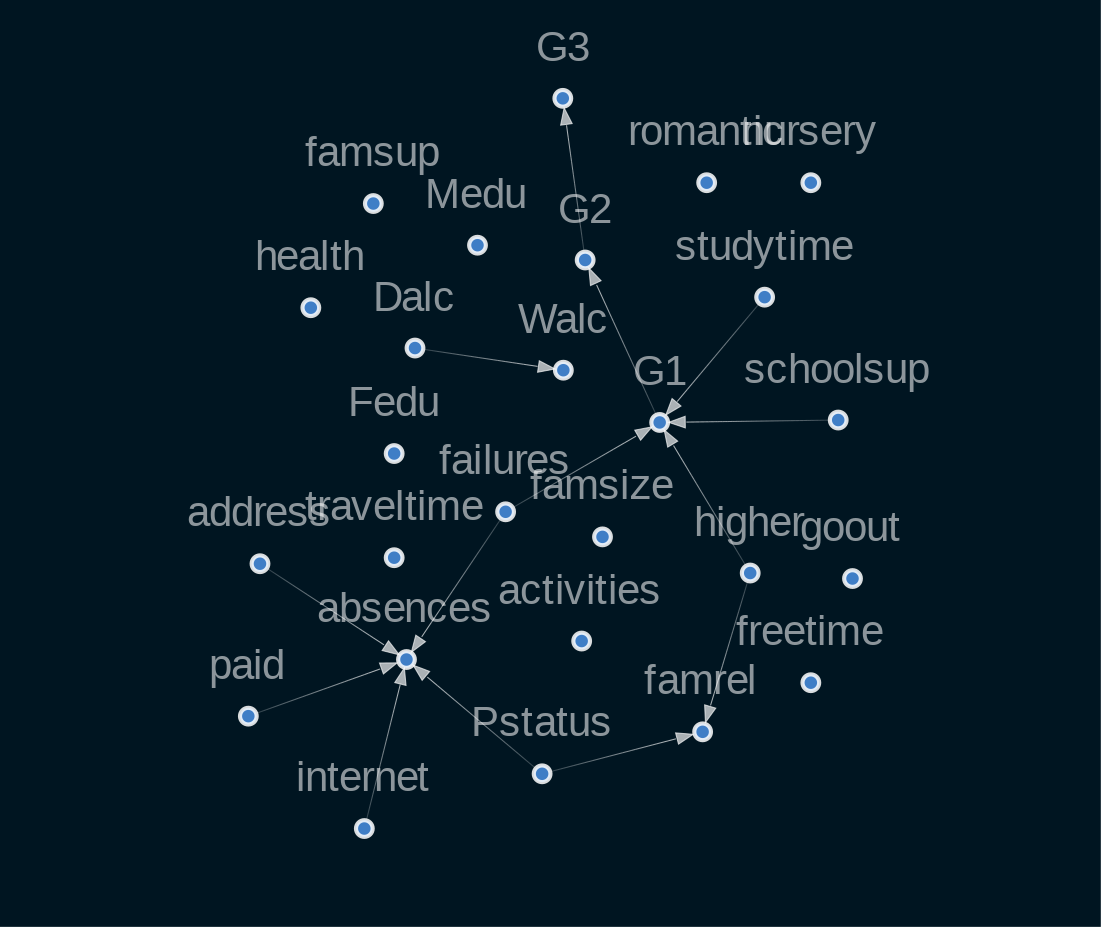

In [ ]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

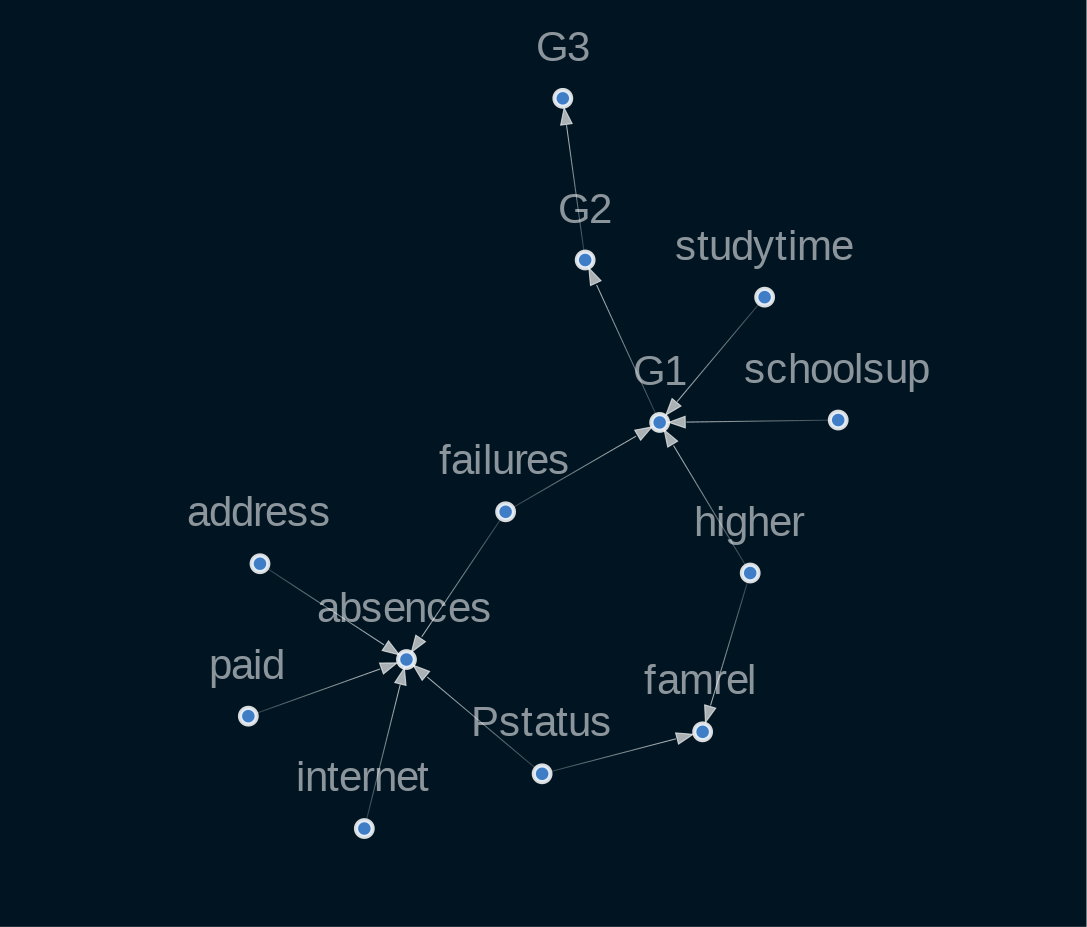

In [ ]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

##Exporting the Structure

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm, 'graph.dot')

## Fitting the Conditional Distribution of the Bayesian Network

In [ ]:
from causalnex.network import BayesianNetwork
bn = BayesianNetwork(sm)

#Preparing the Discretised Data

##Cardinality of Categorical Features

In [ ]:
discretised_data = data.copy()

data_vals = {col: data[col].unique() for col in data.columns}

failures_map = {v: 'no-failure' if v == [0]
                else 'have-failure' for v in data_vals['failures']}
studytime_map = {v: 'short-studytime' if v in [1,2]
                 else 'long-studytime' for v in data_vals['studytime']}

In [ ]:
discretised_data["failures"] = discretised_data["failures"].map(failures_map)
discretised_data["studytime"] = discretised_data["studytime"].map(studytime_map)

##Discretising Numeric Features

In [ ]:
from causalnex.discretiser import Discretiser

discretised_data["absences"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 10]).transform(discretised_data["absences"].values)
discretised_data["G1"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G1"].values)
discretised_data["G2"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G2"].values)
discretised_data["G3"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G3"].values)

##Create Labels for Numeric Features

In [ ]:
absences_map = {0: "No-absence", 1: "Low-absence", 2: "High-absence"}

G1_map = {0: "Fail", 1: "Pass"}
G2_map = {0: "Fail", 1: "Pass"}
G3_map = {0: "Fail", 1: "Pass"}

discretised_data["absences"] = discretised_data["absences"].map(absences_map)
discretised_data["G1"] = discretised_data["G1"].map(G1_map)
discretised_data["G2"] = discretised_data["G2"].map(G2_map)
discretised_data["G3"] = discretised_data["G3"].map(G3_map)

##Train / Test Split

In [ ]:
# Split 90% train and 10% test
from sklearn.model_selection import train_test_split

train, test = train_test_split(discretised_data, train_size=0.9, test_size=0.1, random_state=7)

#Model Probability

In [ ]:
bn = bn.fit_node_states(discretised_data)

##Fit Conditional Probability Distributions

In [ ]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [ ]:
bn.cpds["G1"]

failures    have-failure                  ...     no-failure                
higher                no                  ...            yes                
schoolsup             no                  ...            yes                
studytime long-studytime short-studytime  ... long-studytime short-studytime
G1                                        ...                               
Fail                0.75        0.806452  ...       0.111111        0.255814
Pass                0.25        0.193548  ...       0.888889        0.744186

[2 rows x 16 columns]

##Predict the State given the Input Data

In [ ]:
discretised_data.loc[18, discretised_data.columns != 'G1']

address                     U
famsize                   GT3
Pstatus                     T
Medu                        3
Fedu                        2
traveltime                  1
studytime     short-studytime
failures         have-failure
schoolsup                  no
famsup                    yes
paid                      yes
activities                yes
nursery                   yes
higher                    yes
internet                  yes
romantic                   no
famrel                      5
freetime                    5
goout                       5
Dalc                        2
Walc                        4
health                      5
absences          Low-absence
G2                       Fail
G3                       Fail
Name: 18, dtype: object

In [ ]:
predictions = bn.predict(discretised_data, "G1")

In [ ]:
print(f"The prediction is '{predictions.loc[18, 'G1_prediction']}'")

The prediction is 'Fail'


In [ ]:
print(f"The ground truth is '{discretised_data.loc[18, 'G1']}'")

The ground truth is 'Fail'


#Model Quality

##Classification Report

In [ ]:
from causalnex.evaluation import classification_report

classification_report(bn, test, "G1")

{'G1_Fail': {'f1-score': 0.6666666666666666,
  'precision': 0.7777777777777778,
  'recall': 0.5833333333333334,
  'support': 12},
 'G1_Pass': {'f1-score': 0.9357798165137615,
  'precision': 0.9107142857142857,
  'recall': 0.9622641509433962,
  'support': 53},
 'accuracy': 0.8923076923076924,
 'macro avg': {'f1-score': 0.8012232415902141,
  'precision': 0.8442460317460317,
  'recall': 0.7727987421383649,
  'support': 65},
 'weighted avg': {'f1-score': 0.8860973888496825,
  'precision': 0.8861721611721611,
  'recall': 0.8923076923076924,
  'support': 65}}

##ROC / AUC

In [ ]:
from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn, test, "G1")
print(auc)

0.9181065088757396


#Querying Marginals

##Baseline Marginals

In [ ]:
bn = bn.fit_cpds(discretised_data, method="BayesianEstimator", bayes_prior="K2")

In [ ]:
from causalnex.inference import InferenceEngine

ie = InferenceEngine(bn)
marginals = ie.query()
marginals["G1"]

{'Fail': 0.25260687281677224, 'Pass': 0.7473931271832277}

In [ ]:
import numpy as np

labels, counts = np.unique(discretised_data["G1"], return_counts=True)
list(zip(labels, counts))

[('Fail', 157), ('Pass', 492)]

##Marginals after Observations

In [ ]:
marginals_short = ie.query({"studytime": "short-studytime"})
marginals_long = ie.query({"studytime": "long-studytime"})
print("Marginal G1 | Short Studtyime", marginals_short["G1"])
print("Marginal G1 | Long Studytime", marginals_long["G1"])

Marginal G1 | Short Studtyime {'Fail': 0.2776556433482524, 'Pass': 0.7223443566517477}
Marginal G1 | Long Studytime {'Fail': 0.15504850337837614, 'Pass': 0.8449514966216239}


#Do Calculus

##Updating a Node Distribution

In [ ]:
print("distribution before do", ie.query()["higher"])
ie.do_intervention("higher",
                   {'yes': 1.0,
                    'no': 0.0})
print("distribution after do", ie.query()["higher"])

distribution before do {'no': 0.10752688172043011, 'yes': 0.8924731182795698}
distribution after do {'no': 0.0, 'yes': 0.9999999999999998}


##Resetting a Node Distribution

In [ ]:
ie.reset_do("higher")

##Effect of Do on Marginals

In [ ]:
print("marginal G1", ie.query()["G1"])
ie.do_intervention("higher",
                   {'yes': 1.0,
                    'no': 0.0})
print("updated marginal G1", ie.query()["G1"])

marginal G1 {'Fail': 0.25260687281677224, 'Pass': 0.7473931271832277}
updated marginal G1 {'Fail': 0.20682952942551894, 'Pass': 0.7931704705744809}
